In [1]:
using PyPlot
using Interact

LoadError: ArgumentError: Module Interact not found in current path.
Run `Pkg.add("Interact")` to install the Interact package.

In [12]:
function naca4(m, p, tc, n)

    # normalize inputs
    tc = tc/100.0
    m = m/100.0
    p = p/10.0
    
    # x discretization
    x = linspace(0, 1, n)
    
    # thickness
    tau = 5*tc*(0.2969*sqrt.(x) - 0.1260*x - 0.3516*x.^2 + 0.2843*x.^3 - 0.1015*x.^4)

    # camber
    yc = zeros(x)
    if p != 0
        idx = x .<= p
        yc[idx] = m/p^2*(2*p*x[idx] - x[idx].^2)
        idx = x .> p
        yc[idx] = m/(1-p)^2*(1-2*p + 2*p*x[idx] - x[idx].^2)
    end

    # upper and lower surface
    yu = yc + tau
    yl = yc - tau
    
    return x, yu, yl
end

naca4 (generic function with 1 method)

Interact.Options{:SelectionSlider,Int64}(41: "input-16" = 4 Int64 , "m", 4, "4", 5, Interact.OptionDict(DataStructures.OrderedDict("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict(0=>"0",4=>"4",7=>"7",9=>"9",2=>"2",3=>"3",5=>"5",8=>"8",6=>"6",1=>"1"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Int64}(43: "input-17" = 4 Int64 , "p", 4, "4", 5, Interact.OptionDict(DataStructures.OrderedDict("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict(0=>"0",4=>"4",7=>"7",9=>"9",2=>"2",3=>"3",5=>"5",8=>"8",6=>"6",1=>"1"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Int64}(45: "input-18" = 12 Int64 , "tc", 12, "12", 13, Interact.OptionDict(DataStructures.OrderedDict("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict(18=>"18",2=>"2",16=>"16",11=>"11",21=>"21",0=>"0",7=>"7",9=>"9",10=>"10",25=>"25"…)), Any[], Any[], true, "horizontal", true)

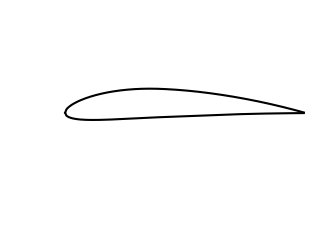

In [14]:
n = 200
f = figure()

@manipulate for m=0:1:9, p=0:1:9, tc=0:1:25; withfig(f) do
        x, yu, yl = naca4(m, p, tc, n)
        plot(x, yu, "k")
        plot(x, yl, "k")
        
        xlim([-0.05, 1.05])
        ylim([-0.4, 0.4])
        axis("off")
    end
end
